In [1]:
# imports
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Article that was published on [Medium](https://elibrunette.medium.com/factors-to-increase-rental-prices-for-airbnb-6a4cbb928e0d) discussing interesting information from analysis.

# Section 1: Business Understanding

#### The purpose of this project is to find insight in the dataset for AirBnB datasets. A few questions that would be interesting to explore would be and that correlates to how much money one might make on rental properties. 
### Question 1: Does having more pictures of the house correspond to higher overall reviews or prices for the location? 
### Question 2: Is square feet correlated to price?  
### Question 3: What feature correlates to higher prices? 
### Question 4: What feature correlate to higher overall review ratings? 
### Question 5: What days are the most popular? Specifically Weekdays or Weekends? 
### Question 6: Does higher review count correspond to higher prices on the location? 
### Question 7: Does not having a picture correlate to not having a review?

# Section 2: Data Understanding

In [2]:
#read in the data
calendar = pd.read_csv('./data/archive/calendar.csv')
listings = pd.read_csv('./data/archive/listings.csv')
reviews = pd.read_csv('./data/archive/reviews.csv')

#### Look at the columns of the data

In [3]:
# summary of columns in the calendar file
calendar.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [4]:
# summar of the columns in the listings file
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [5]:
# summary of the columns in the reviews file
reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

#### Does having more pictures of the house correspond to higher overall reviews or prices for the location? 

In [6]:
# Figure out how much of the data is missing.
listings[['thumbnail_url','medium_url','xl_picture_url']].isna().mean()

thumbnail_url     0.083814
medium_url        0.083814
xl_picture_url    0.083814
dtype: float64

In [7]:
# Filling with the value of 0 becuase the cleaning method below will use that to feature generate a column for a binary value for if the url is present
dataForPictureQuestion = listings[['thumbnail_url','medium_url','xl_picture_url','review_scores_value']].dropna(subset=['review_scores_value']).fillna(0)

In [8]:
#cleaning up the column values
for col in dataForPictureQuestion[['thumbnail_url','medium_url','xl_picture_url']].columns: 
    dataForPictureQuestion[col] = dataForPictureQuestion[col].apply(lambda x: 1 if x != 0 else 0)

In [9]:
# view the result from the previous cleaning method. Expecting the only values in the columns to be 1 or 0 to help with filtering
dataForPictureQuestion.head()

,thumbnail_url,medium_url,xl_picture_url,review_scores_value
0,0,0,0,10.0
1,1,1,1,10.0
2,0,0,0,10.0
4,0,0,0,9.0
5,1,1,1,10.0


In [10]:
# looking at the rows that have thumbnail_url and testing other pictures.
# Specifically paying attention to the size at the end, and looking into what the data looks like
dataForPictureQuestion[(dataForPictureQuestion['thumbnail_url'] == 1)]

,thumbnail_url,medium_url,xl_picture_url,review_scores_value
1,1,1,1,10.0
5,1,1,1,10.0
6,1,1,1,10.0
7,1,1,1,10.0
8,1,1,1,10.0
...,...,...,...,...
3810,1,1,1,8.0
3811,1,1,1,10.0
3812,1,1,1,10.0
3813,1,1,1,8.0


In [11]:
# Comparying size of the various other types of pictures, and seeing if the size is the same compared to the previous column.
# Maybe some of the data is different? 
dataForPictureQuestion[(dataForPictureQuestion['medium_url'] == 1) & (dataForPictureQuestion['xl_picture_url'] == 1)]

,thumbnail_url,medium_url,xl_picture_url,review_scores_value
1,1,1,1,10.0
5,1,1,1,10.0
6,1,1,1,10.0
7,1,1,1,10.0
8,1,1,1,10.0
...,...,...,...,...
3810,1,1,1,8.0
3811,1,1,1,10.0
3812,1,1,1,10.0
3813,1,1,1,8.0


#### The data suggests that if you have one picture in the listing, then you will have all of the pictures in the listing. Determined by adjusting the columns in the previous cell, and noting that they all have the same number of rows in the resulting dataset. Also that the dataset has about 90% of a value in the dataset. 

I would like to see a correlation of scores to each of the datasets values. I am including the various picture values, even though if you have one value, then you will get ones across the board. <br>
Using the information that if it is one value for any of the picture urls, then it has a value for all of them. That means that I can keep one column and if it is true for that column, then it will hold true for all of them, and try to save some local ram for the dummy columns. I just randomly decided to use the 'thumbnail_url' column.

In [12]:
# Checking all of the unique values for the review scores. Make sure there isn't anything weird about them eg -1 values
dataForPictureQuestion['review_scores_value'].unique()

array([10.,  9.,  8.,  7.,  6.,  4.,  2.,  5.])

In [13]:
# Splitting up the dataset, and trying to get the data split up for analysis in the heatmap visual. 
dummyScoreValues = pd.get_dummies(dataForPictureQuestion['review_scores_value'])
#change values so that when we create a dummy column for it, the values will make sense in the resulting dataset.
dataForPictureQuestion['thumbnail_url'].loc[dataForPictureQuestion['thumbnail_url'] == 1] = 'Contains Pictures'
dataForPictureQuestion['thumbnail_url'].loc[dataForPictureQuestion['thumbnail_url'] == 0] = 'No Pictures'
dummyPictureValues = pd.get_dummies(dataForPictureQuestion['thumbnail_url'])

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [14]:
#in the large string of items I group_by values to count the items in the group. Then I reset the index to be able to pivot based on the previous columns. 
# finally filling na with 0 for any NA values becuase NA means that they didn't have any counts in the count method. 
dataForPictureHeatmap = dataForPictureQuestion[['thumbnail_url','review_scores_value','medium_url']].groupby(['thumbnail_url','review_scores_value']).count()\
                                                                            .rename({'medium_url':'count'},axis=1)\
                                                                            .reset_index()\
                                                                            .pivot('thumbnail_url','review_scores_value','count')\
                                                                            .fillna(0)

In [15]:
# taking a look at the dataset that was created
dataForPictureHeatmap

review_scores_value,2.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
thumbnail_url,,,,,,,,
Contains Pictures,1.0,4.0,1.0,15.0,33.0,179.0,1032.0,1640.0
No Pictures,0.0,0.0,0.0,1.0,5.0,11.0,105.0,135.0


Text(156.5, 0.5, 'Listing posting contains pictures.')

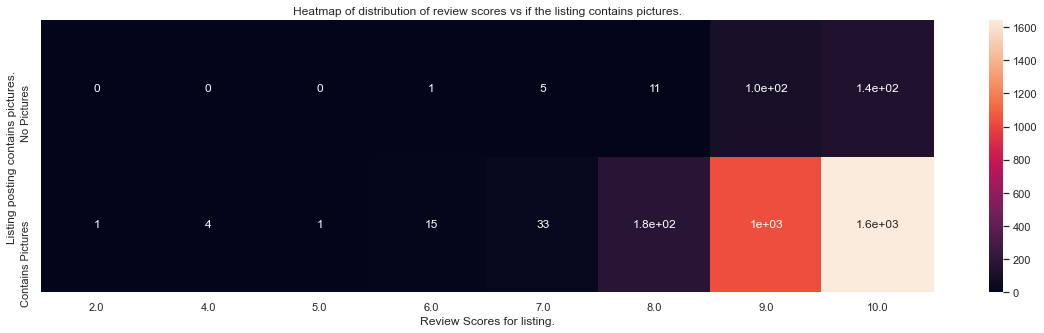

In [16]:
# Plotting the dataset as a heatmap for a visual representation of the table in the previous cell. 
# This visual is also seen in the summary and the readme
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(20,5)})
sns.heatmap(dataForPictureHeatmap,annot=True).set_ylim([0,2])
plt.title('Heatmap of distribution of review scores vs if the listing contains pictures.')
plt.xlabel("Review Scores for listing.")
plt.ylabel("Listing posting contains pictures.")

#### This picture shows is a visual representation of the distribution of pictures vs review score. This shows that most of the values that contain pictures also recieve a higher rating. However, compared to the other distribution, the listings with no pictures still recieve a very high review even if they don't have a picture. So it looks like, no picture, no problem! You are in the minority for not posting listings with pictures, but it doesn't seem to matter. 

#### Time to see if this is also representative of the entire dataset. 

Text(0.5, 1.0, 'Histogram of review scores')

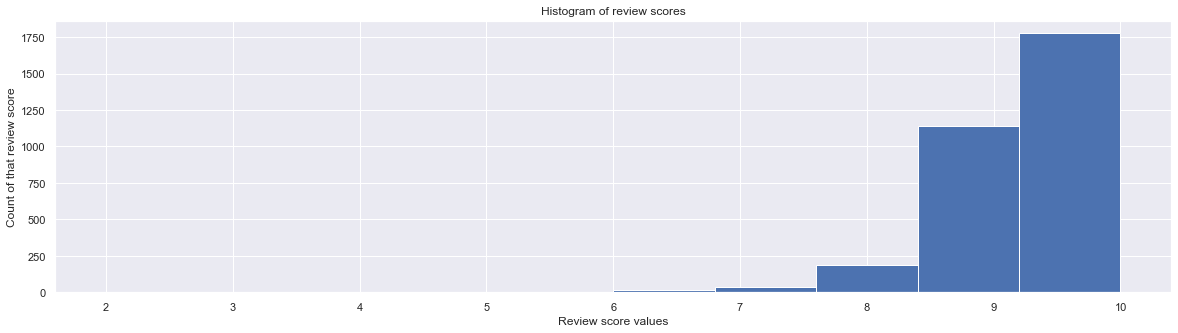

In [17]:
# A histogram of the overall review scores of the dataset. 
# Visual is also represented in the readme, and in the analysis of this jupyter notebook
listings['review_scores_value'].hist()
plt.xlabel("Review score values")
plt.ylabel("Count of that review score")
plt.title("Histogram of review scores")

In [18]:
# Reviewing the summary statistics 
listings['review_scores_value'].describe()

count    3162.000000
mean        9.452245
std         0.750259
min         2.000000
25%         9.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: review_scores_value, dtype: float64

This plot shows that the lowest review score is a 2, and most of the distribution of rentals are towards the top for analyses that have pictures attached to the rental. <br> 
This also shows us that the overall review score is skewed towards the high end with more everyone enjoying their stay at AirBnB rooms. With over half of the review scores being a 10. 

### Is square feet correlated to price?

First thing to do is to look into the features for those two items.

In [19]:
listings['square_feet'].isna().sum()

3721

In [20]:
listings.shape

(3818, 92)

#### This shows that there isn't a ton of data around the square feet, and problable won't be able to accurately infer a square feet from the data that isn't biased... <br> 
#### However, we still might be able to infer some inforamtion from what we have.

In [21]:
not_null_square_feet = listings[listings['square_feet'].notnull()]

In [24]:
def clean_price_column(x):
    """
    Removes the $ value, and commas in a price value. 
    
    Param: the value you wish to adjust
    Type: String
    Rtype: String
    Retrun: String that allows the value to be type casted to a float
    """
    return x.replace('$', '').replace(',','')

In [25]:
# Doing some basic cleaning of the columns and preparing them for plot
not_null_square_feet['price'] = pd.to_numeric(not_null_square_feet['price'].str.replace('$',''))
not_null_square_feet.sort_values(['price','square_feet'])[['price','square_feet']]

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,price,square_feet
381,40.0,2000.0
1973,50.0,1300.0
3103,54.0,250.0
1997,55.0,1300.0
502,60.0,140.0
...,...,...
2634,325.0,1200.0
2824,360.0,1850.0
1863,370.0,3000.0
461,395.0,3000.0


In [26]:
# Looking into a couple of edge cases for the visual
not_null_square_feet[not_null_square_feet['square_feet'] == 3]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
658,639130,https://www.airbnb.com/rooms/639130,20160104002432,2016-01-04,Fabulous home for a family!,NaN,This is the perfect home for a family wanting ...,This is the perfect home for a family wanting ...,none,NaN,NaN,NaN,https://a2.muscache.com/ac/pictures/8225314/4d...,https://a2.muscache.com/im/pictures/8225314/4d...,https://a2.muscache.com/ac/pictures/8225314/4d...,https://a2.muscache.com/ac/pictures/8225314/4d...,3187723,https://www.airbnb.com/users/show/3187723,Ann,2012-08-07,"Seattle, Washington, United States",Active family living in the heart of Seattle. ...,within a day,75%,NaN,f,https://a1.muscache.com/ac/users/3187723/profi...,https://a1.muscache.com/ac/users/3187723/profi...,Madrona,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"33rd Ave, Seattle, WA 98122, United States",Madrona,Madrona,Central Area,Seattle,WA,98122,Seattle,"Seattle, WA",US,United States,47.609749,-122.290109,t,House,Entire home/apt,8,3.0,4.0,5.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",3.0,195.0,"$1,350.00",NaN,NaN,$100.00,1,$0.00,3,21,7 weeks ago,t,0,23,50,322,2016-01-04,2,2015-07-28,2015-09-07,80.0,9.0,7.0,8.0,9.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.37


Text(0.5, 0, 'Square feet for rental')

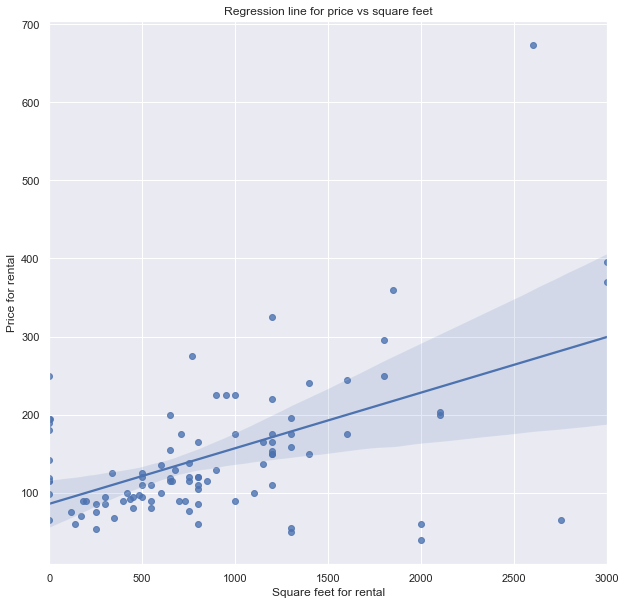

In [27]:
sns.set(rc={'figure.figsize':(10,10)})
sns.regplot(data=not_null_square_feet.sort_values(['price']),x='square_feet',y='price')
plt.title("Regression line for price vs square feet")
plt.ylabel("Price for rental")
plt.xlabel("Square feet for rental")

Since there is only 97 rows with square feet not null <br>
However, from the data present, there is a notable correlation between price and square feet noted both in the scatter plot. The other thing of note is the low values pushing the trend a little higher on he bottom. So we will remove those outliars in the dataset. 

In [28]:
# Looking at unique values and trying to determine if there is any weird values. eg 0,1,-1,etc
not_null_square_feet.sort_values('square_feet')['square_feet'].unique()

array([0.00e+00, 1.00e+00, 2.00e+00, 3.00e+00, 1.20e+02, 1.40e+02,
       1.70e+02, 1.83e+02, 2.00e+02, 2.50e+02, 3.00e+02, 3.40e+02,
       3.50e+02, 4.00e+02, 4.20e+02, 4.35e+02, 4.50e+02, 4.85e+02,
       5.00e+02, 5.50e+02, 6.00e+02, 6.50e+02, 6.60e+02, 6.75e+02,
       7.00e+02, 7.10e+02, 7.30e+02, 7.50e+02, 7.70e+02, 8.00e+02,
       8.50e+02, 9.00e+02, 9.50e+02, 1.00e+03, 1.10e+03, 1.15e+03,
       1.20e+03, 1.30e+03, 1.40e+03, 1.60e+03, 1.80e+03, 1.85e+03,
       2.00e+03, 2.10e+03, 2.60e+03, 2.75e+03, 3.00e+03])

In [29]:
# Cleaning up the visual and removing any weird values noted from the previous unique value
outliar_values = [1.0, 2.0, 3.0, 4.0]
removed_lower_limit_outliars = not_null_square_feet[~not_null_square_feet['square_feet'].isin(outliar_values)]

Text(0.5, 0, 'Square feet for rental')

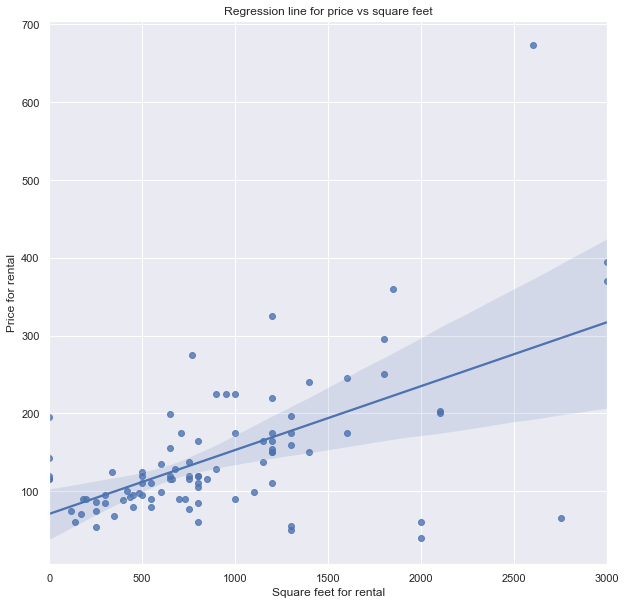

In [30]:
# Plotting the visuals
sns.set(rc={'figure.figsize':(10,10)})
sns.regplot(data=removed_lower_limit_outliars.sort_values(['price']), x='square_feet', y='price')
plt.title("Regression line for price vs square feet")
plt.ylabel("Price for rental")
plt.xlabel("Square feet for rental")

What days are the most popular? Specifically Weekdays or Weekends?

In [31]:
# More imports
from datetime import datetime

In [32]:
# Looking into the other dataset for answering question 5.
calendar.head(20)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [33]:
def is_weekend(date_in):
    """
    Retruns a boolean for if the time passed in is on the weekend or not. 
    Note is that Friday is considered a weekday under this rule, because it is a normal workday. 
    
    Param: date: The string of the format YYYY-M-D representing a date.
    Type: String
    Rtype: Boolean
    Return: True if the date passed in is on a weekend, and false if it is a weekday.  
    """
    date = datetime.strptime(date_in, '%Y-%m-%d')
    if date.weekday() > 4: 
        return True
    return False

In [34]:
# Cleaning up the date column and figuring out if the data is on the weekend or not. 
calendar['weekend'] = calendar['date'].apply(is_weekend)

In [35]:
# Checking some values that made the method error, and finding if they have been cleaned. A mini sanity test if you will. 
calendar[calendar['available'] == 'f']['price'].unique()

array([nan], dtype=object)

A note for price on nights that are unavialable is null. So we will only be able to analyze the price for if the listing is available for that day. 

In [36]:
# Now checking the opposite of before.
available = calendar[calendar['available'] == 't']

In [37]:
# Cleaning up the price column to make the visual appear correct, and not have the price column be treated as strings.
available['price'] = pd.to_numeric(available['price'].apply(clean_price_column))

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
#determining the overall mean before splitting into weekend and weekdays
available['price'].mean()

137.94485855103355

In [39]:
# declaration of varables to do analysis and to keep the DRY principle.
available_weekends = available[(available['weekend'] == True)]
available_weekdays = available[available['weekend'] == False]

In [40]:
#checking the mean for weekends to see if they have changed from the overall mean of the dataset. 
available_weekends['price'].mean()

139.81785498273783

In [41]:
# same analysis as previous cell. 
# Checking to see if the weekday price is lower than the weekend and where it is in comparison to the overall mean. 
available_weekdays['price'].mean()

137.1988889105009

Interesting that the mean for the whole dataset is closer to the mean for the weekdays, however this makes sense because of the number of weekdays compared to weekend days. 

<AxesSubplot:>

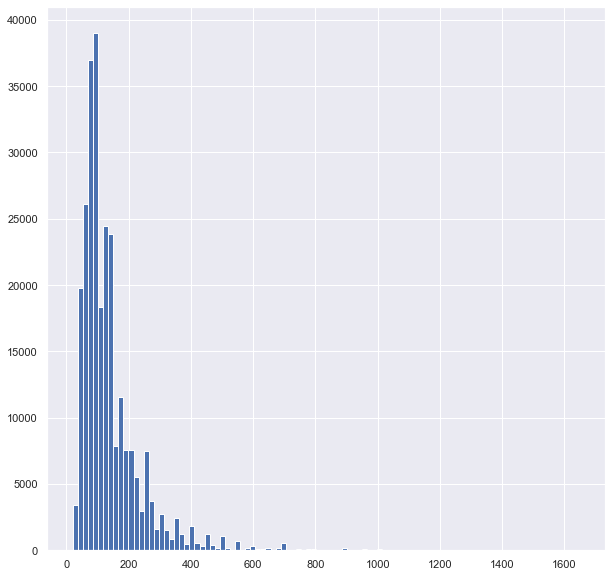

In [42]:
# Plotting a histogram of the weekend prices.
available_weekends['price'].hist(bins=100)

In [43]:
# Getting the summary statistics of the weekend prices. 
available_weekends['price'].describe()

count    266189.000000
mean        139.817855
std         105.893073
min          20.000000
25%          75.000000
50%         110.000000
75%         165.000000
max        1650.000000
Name: price, dtype: float64

#### Shows that the distibution has a lot of lower valued rooms available on the weekends. Seeming ot be lumping around the 100 range. 

<AxesSubplot:>

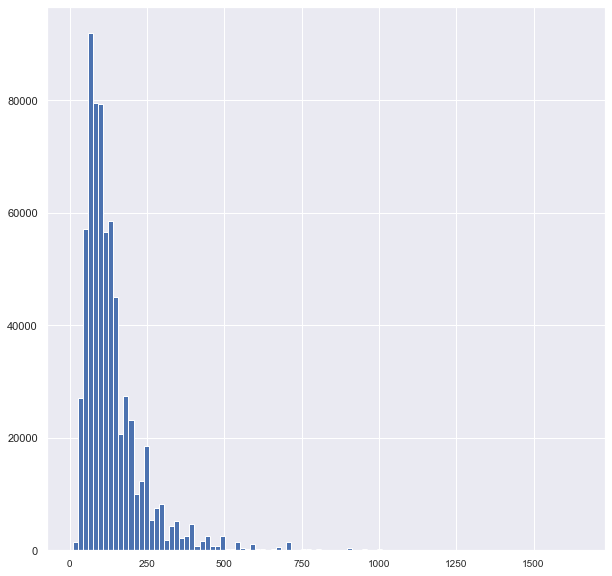

In [44]:
# Plotting a histogram of the weekdays
available_weekdays['price'].hist(bins=100, xlabelsize=10)

In [45]:
# summary stats for weekdays
available_weekdays['price'].describe()

count    668353.000000
mean        137.198889
std         104.721140
min          10.000000
25%          75.000000
50%         105.000000
75%         160.000000
max        1650.000000
Name: price, dtype: float64

#### Shows the same result at the previous histogram, and the describe function seems to validate with the 50% being 105. <br> 
These distributions seem to represent log scales. So next is to convert and see if that assumption is accurate.

In [46]:
# confirming a suspician that the data is a lognormal distribution 
import math 
available_weekdays['Log Base 10 Price'] = available_weekdays['price'].apply(math.log10)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Log10 histogram of price on weekdays')

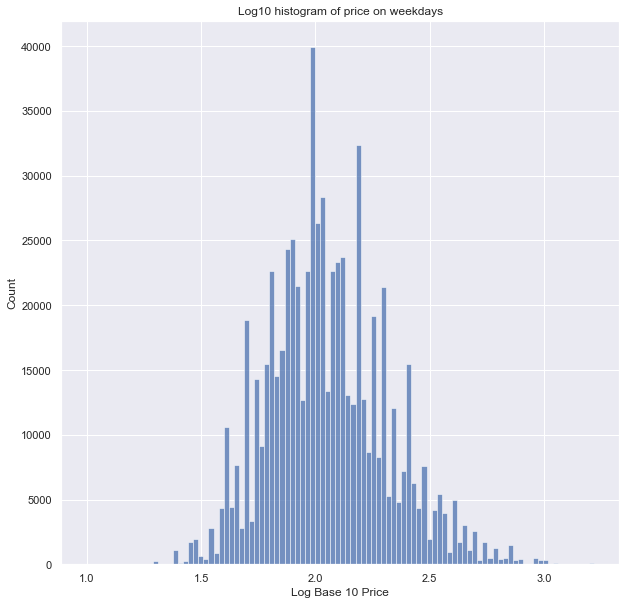

In [47]:
# Checking suspicion visually
sns.histplot(available_weekdays, x="Log Base 10 Price", bins=100).set_title('Log10 histogram of price on weekdays')

#### Indeed, the distribution is log based

In [48]:
# Seeing if summary stats agree.
available_weekends['price'].describe()

count    266189.000000
mean        139.817855
std         105.893073
min          20.000000
25%          75.000000
50%         110.000000
75%         165.000000
max        1650.000000
Name: price, dtype: float64

#### Curious if the weekend distribution is the same.

In [49]:
# Checking same thing as before
available_weekends['Log Base 10 Price'] = available_weekends['price'].apply(math.log10)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Log10 histogram of price on weekends')

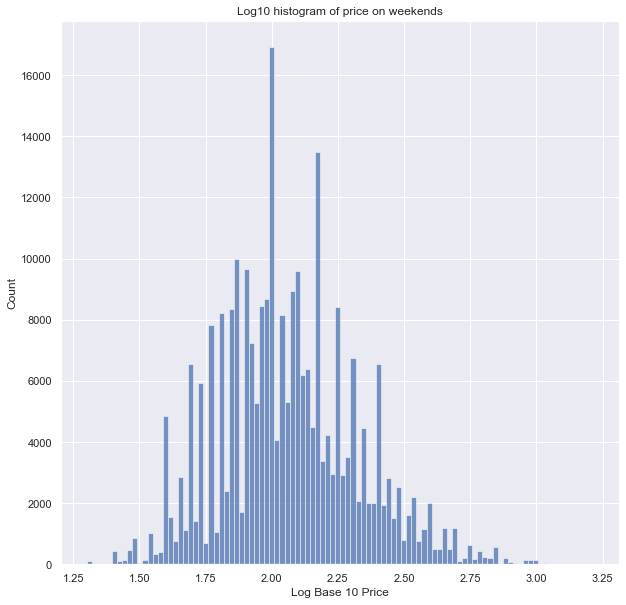

In [50]:
#plotting weekend distribution as a histogram plot
sns.histplot(available_weekends, x="Log Base 10 Price", bins=100).set_title('Log10 histogram of price on weekends')

### And indeed it looks that way as well. 

Now to investigate a little more of the distribution before doing data preparation for the modeling.

In [51]:
# Checking the value that appears the most for weekends and weekdays
available_weekends['price'].mode()

0    150.0
dtype: float64

In [52]:
available_weekdays['price'].mode()

0    150.0
dtype: float64

In [53]:
# Finding the total number of availability from the original dataset
len(calendar[calendar['available']=='t'])

934542

In [54]:
### Bonus: What does number of reviews compared to price look like? 

In [55]:
listings['price'] = listings['price'].apply(clean_price_column).astype('float64')

<AxesSubplot:xlabel='reviews_per_month', ylabel='price'>

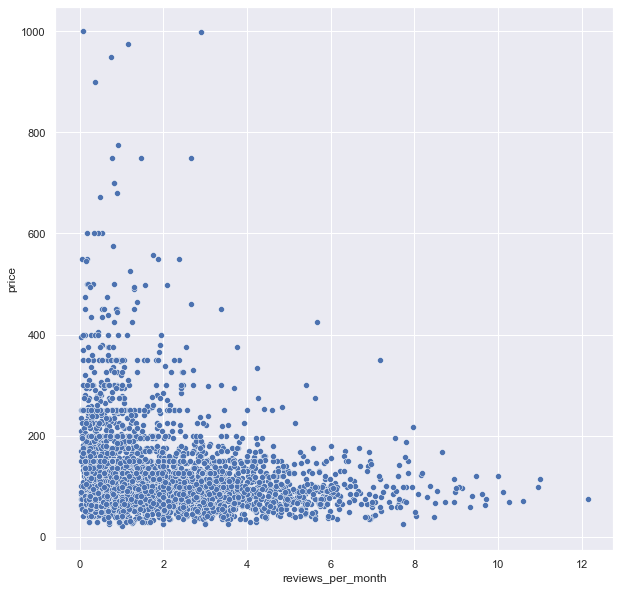

In [56]:
sns.scatterplot(data=listings, x='reviews_per_month', y='price')

Just checking listing reviews because I was curious. I don't think that there is much to gleen from this except that the more rentals you have, it appears that you have lower prices for that property. Most likely due to the rental being available during the weekdays. The ones with less reviews per month are higher prices, meaning that they are most likely rentals that are on rentals available one the weekend. <br> 
Along with the fact that if there are that many reviews for one property that indicates that there are a lot of people visiting that property in a month. Or they have some sort of incentive for leaving a review. <br> 
Another option is review buffing by having the same person leave multiple reviews for the same property. 

# Section 3: Data Preparation  

### What feature correlates to higher prices and create a model around it to analyze the coefficients for multiple variable analysis? <br> 
To start the data will have to be cleaned and then the information viewed to be described. 

In [57]:
#only grabbing the data that will fit the model at this moment. 
#If time allows I will add more data into the model to see if it affects the overall trend found from this analysis
startingListings = listings.select_dtypes(include=['double','int'])

In [58]:
# The goal is to predict price, so we will assign that to the y variable.
y=listings['price']

In [59]:
listings['square_feet'].isna().mean()

0.9745940282870613

Dropping latitude and longitude from the dataset, because they have unique values for the entire dataset, and could be trained to be a 1-1 relationship with price.<br> 
Also dropping license, because it has all null values for this dataset. <br> 
Finally, dropping square feet from the dataset, because of the significant number of null values. 97% null will sway the dataset weights for square feet given the method for filling na values. <br>
The goal is to create a model for price and analyse the coef_ attribute to see what columns have a postive correlation to the price of the unit. 

In [60]:
x = startingListings.drop(['price','latitude','longitude','license','square_feet'],axis=1)

In [61]:
# Checking missing values and make sure that we don't have a ton of outliars from before. 
x.isna().sum()

host_listings_count              2
host_total_listings_count        2
bathrooms                       16
bedrooms                         6
beds                             1
review_scores_rating           647
review_scores_accuracy         658
review_scores_cleanliness      653
review_scores_checkin          658
review_scores_communication    651
review_scores_location         655
review_scores_value            656
reviews_per_month              627
dtype: int64

In [62]:
x.shape

(3818, 13)

In [63]:
x.describe()

,host_listings_count,host_total_listings_count,bathrooms,bedrooms,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,3816.000000,3816.000000,3802.000000,3812.000000,3817.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3191.000000
mean,7.157757,7.157757,1.259469,1.307712,1.735394,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.078919
std,28.628149,28.628149,0.590369,0.883395,1.139480,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,1.822348
min,1.000000,1.000000,0.000000,0.000000,1.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,0.020000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.695000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.540000
75%,3.000000,3.000000,1.000000,2.000000,2.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000
max,502.000000,502.000000,8.000000,7.000000,15.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,12.150000


In [64]:
# Given the number of na values in the dataset, it makes sense to add fill the nas with values that doesn't make sense for the model. 
# If we removed all na values, there would not be much of a dataset for modeling.
filled_na = x.fillna(-1)

In [65]:
x_train, x_test, y_train, y_test = train_test_split(filled_na, y, test_size=.33, random_state=42)

# Section 4: Modeling

Continuing the duscussion above for finding a linear regression model for price and what values help predict price. 

In [66]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [67]:
# Standard fitting and training of the dataset. Along with doing some predictions on the test set
reg.fit(x_train, y_train)
pred = reg.predict(x_test)

In [68]:
# Printing the coefficients of the trained model. 
reg.coef_

array([ 8.62086564e+13, -8.62086564e+13,  2.84778900e+01,  2.99324036e+01,
        2.10552979e+01,  1.15234375e-01,  4.50134277e+00,  5.74682617e+00,
       -4.91534424e+00, -3.29296875e+00,  1.11668091e+01, -1.36001587e+01,
       -4.23388672e+00])

Based on the coefficients for the logistical model, it looks like the three highest attributes to determine price is bathrooms, bedrooms and beds. 

In [69]:
# Training on a different dataset with na filled
reg2 = linear_model.LinearRegression()
reg2.fit(filled_na, y)

LinearRegression()

In [70]:
# Printing out the coef of the dataset
reg2.coef_

array([  0.03759902,   0.03759902,  25.64246268,  33.4590039 ,
        18.91091786,   0.28076261,   4.35812354,   4.07854679,
        -3.08484173,  -5.60560729,  11.93633333, -13.5410611 ,
        -3.89592605])

# Section 5: Evaluation

## 1. Does having more pictures of the house correspond to higher overall reviews or prices for the location? 
   1. Which ones have a better correlation to the higher review?
      1. After some review it appears there is a good coorelation between including pictures and ratings.
      2. This could be just reflecting the overall distribution of reviews for the data though without showing any clear signs of one being better than the other.      

Text(0.5, 1.0, 'Histogram of review scores')

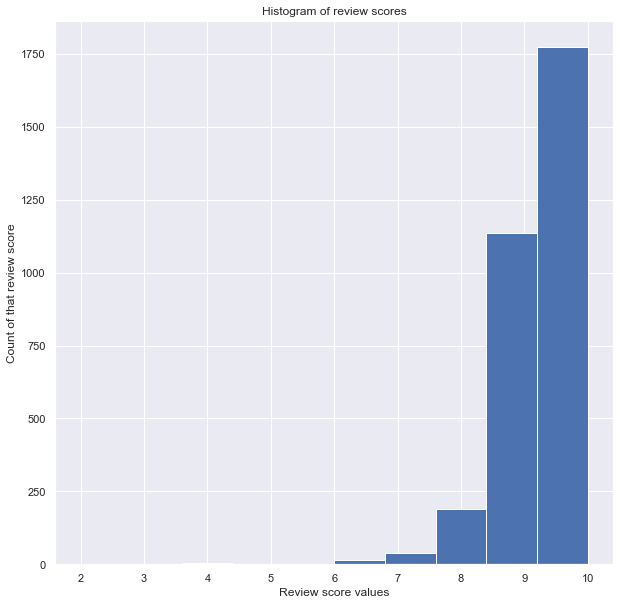

In [71]:
listings['review_scores_value'].hist()
plt.xlabel("Review score values")
plt.ylabel("Count of that review score")
plt.title("Histogram of review scores")

This picture shows the overall review scores distribution for the data. 

Text(156.5, 0.5, 'Listing posting contains pictures.')

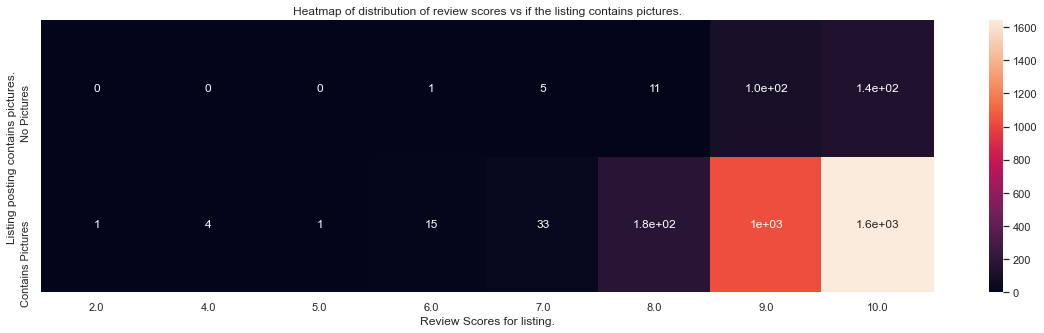

In [72]:
sns.set(rc={'figure.figsize':(20,5)})
sns.heatmap(dataForPictureHeatmap,annot=True).set_ylim([0,2])
plt.title('Heatmap of distribution of review scores vs if the listing contains pictures.')
plt.xlabel("Review Scores for listing.")
plt.ylabel("Listing posting contains pictures.")

This is a heatmap of the review scores vs if they contain pictures. This visualization shows that there is a significant more amount of reviews containing pictures than not. However the distribution for no pictures drops off significantly at 8s, while reviews for listings with pictures drop off around review scores of 7.

## 2. Is square feet correlated to price?  
   1. Since there is only 97 rows with square feet not null, this questions will be excluded from investigation
   2. However, from the data present, there isn't any notable correlation between price and square feet

Text(0.5, 0, 'Square feet for rental')

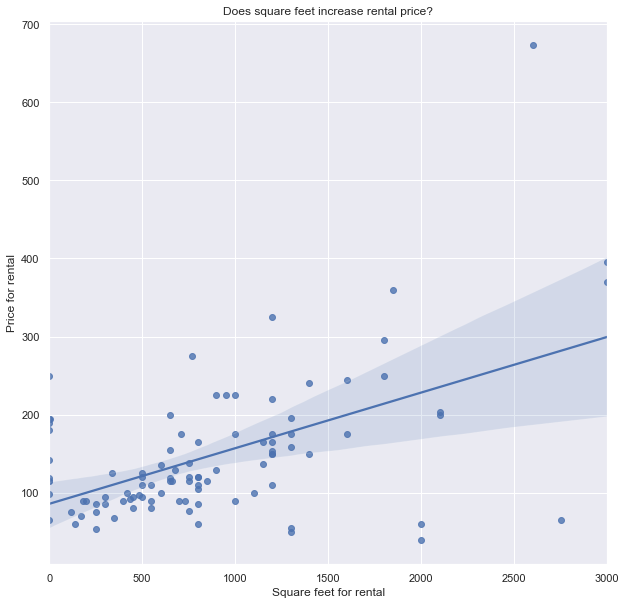

In [73]:
sns.set(rc={'figure.figsize':(10,10)})
sns.regplot(data=not_null_square_feet.sort_values(['price']),x='square_feet',y='price')
plt.title("Does square feet increase rental price?")
plt.ylabel("Price for rental")
plt.xlabel("Square feet for rental")

This plot showing square feet and price for rentals have an overall upward trend, even with some outliars. There is also a note about the square feet less than 100 and with prices that are fairly high for a night stay. These values pull the trend line down. This chart also has square feet of 0,1,2 ft^2 removed as well. However, dispite that, there is a correlation between square feet and rental price. Another note about this graph is that there isn't a ton of points, compared to the whole dataset (N ~ 100). 

### 3. What feature correlates to higher prices? 
   1. Based on the coefficients for the linear model, it looks like the three highest attributes to determine price is bathrooms, bedrooms and beds.

In [74]:
linear_model_coef = pd.DataFrame()
linear_model_coef['columns'] = x.columns
linear_model_coef['coef'] = reg2.coef_
linear_model_coef['annotation'] = reg2.coef_

In [75]:
linear_model_coef[['columns','coef']]

,columns,coef
0,host_listings_count,0.037599
1,host_total_listings_count,0.037599
2,bathrooms,25.642463
3,bedrooms,33.459004
4,beds,18.910918
5,review_scores_rating,0.280763
6,review_scores_accuracy,4.358124
7,review_scores_cleanliness,4.078547
8,review_scores_checkin,-3.084842
9,review_scores_communication,-5.605607


Text(0.5, 1.0, 'What features affect the price of the rental?')

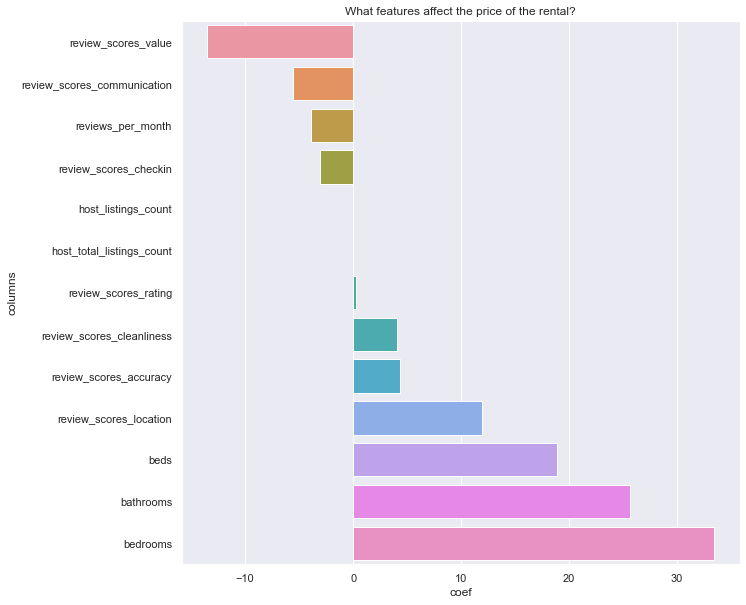

In [76]:
plot = sns.barplot(x='coef', y='columns', data=linear_model_coef.sort_values('coef'))
plt.title("What features affect the price of the rental?")

From the table, it is apparent that the best correlations to bedrooms, bathrooms, beds, review_scores_location, and the negative correlation is review_scores_value. 

### 4. What feature correlate to higher overall review ratings? 

See visual from 3 and analysis from 3. 

### 5. What days are the most popular? Specifically Weekdays or Weekends? 
   1. The data suggests that there is a correlation to the weekends having higher base rate for most of the stats. 

Text(0.5, 1.0, 'What does the distribution of weekend prices?')

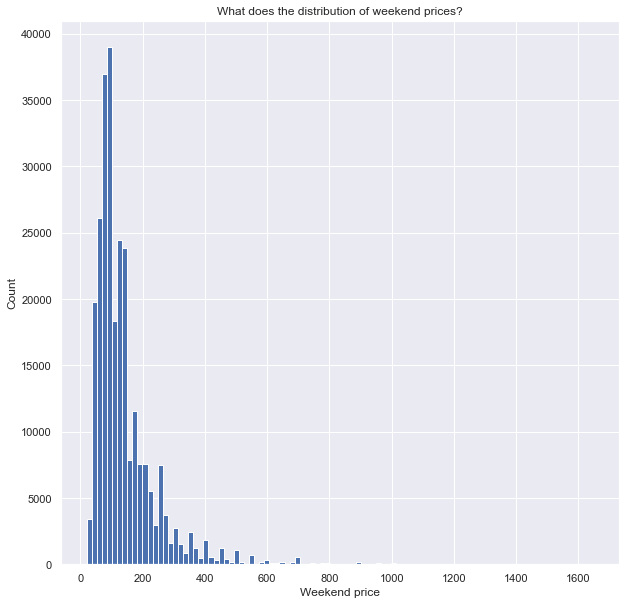

In [77]:
available_weekends['price'].hist(bins=100)
plt.xlabel('Weekend price')
plt.ylabel('Count')
plt.title("What does the distribution of weekend prices?")

Histogram of the weekend price showing that there is a huge spike of prices at the lower end of the dataset. With the distribution being: 

In [78]:
available_weekends['price'].describe()

count    266189.000000
mean        139.817855
std         105.893073
min          20.000000
25%          75.000000
50%         110.000000
75%         165.000000
max        1650.000000
Name: price, dtype: float64

In [79]:
available_weekends['price'].mode()

0    150.0
dtype: float64

Text(0.5, 1.0, 'What is the distribution of weekday prices?')

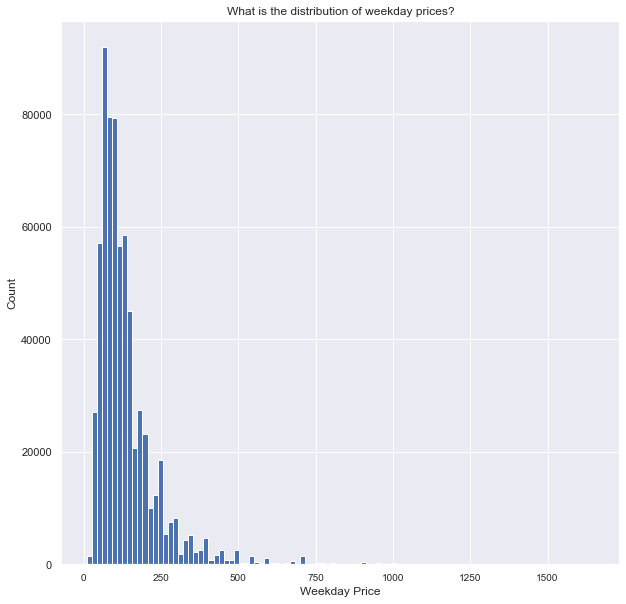

In [80]:
available_weekdays['price'].hist(bins=100, xlabelsize=10)
plt.xlabel("Weekday Price")
plt.ylabel("Count")
plt.title("What is the distribution of weekday prices?")

In [81]:
available_weekdays['price'].describe()

count    668353.000000
mean        137.198889
std         104.721140
min          10.000000
25%          75.000000
50%         105.000000
75%         160.000000
max        1650.000000
Name: price, dtype: float64

In [82]:
available_weekdays['price'].mode()

0    150.0
dtype: float64

Based on the summary statistics for these distributions, the mean is more on the weekend, and most of the distribution is scued up on the weekend based on the 50th and 75th percent. So, overall the prices tend to be higher on the weekends. 

### 6. Does higher review count correspond to higher prices on the location? 

Based on the review from 3, it does not appear so. Actually the review scores negatively attribute to price. I believe this is because of the number of highly rated properties and listings in the dataset. 

### 7. Does not having a picture correlate to not having a review?
   1. It does not. There is a good portion of na reviews that have pictures. I again believe that this has something to do with the overall distribution of the data for the dataset.